<a href="https://colab.research.google.com/github/maxskoda/NR_autoreduce/blob/master/INTER_LiveData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone 'https://github.com/maxskoda/NR_autoreduce/'

Cloning into 'NR_autoreduce'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 66 (delta 15), reused 56 (delta 10), pack-reused 0
Unpacking objects: 100% (66/66), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


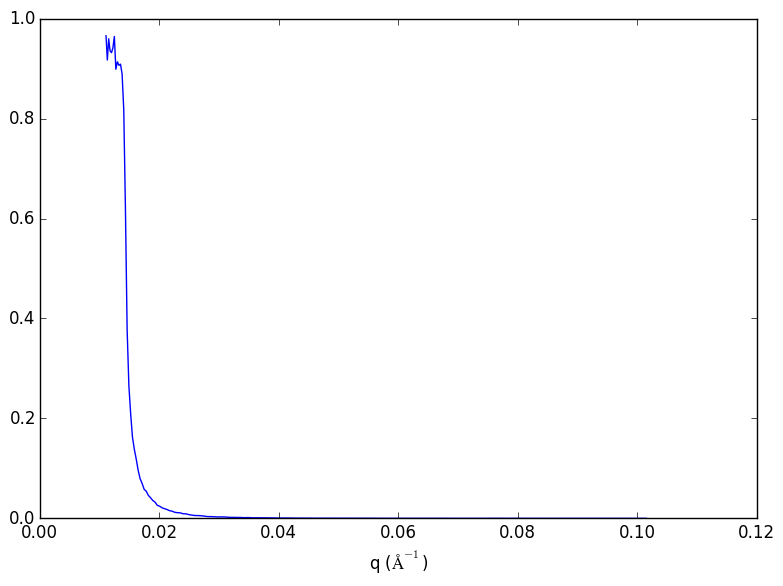

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/livedata.png', width=400, height=400)

In [ ]:
import ipywidgets as widgets
import glob
import os
from ipywidgets import Layout
# import chart_studio.plotly as py

import matplotlib.pyplot as plt
import numpy as np
from plotly.offline import iplot
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = "colab"

In [ ]:
def nr_plot(file_list):
    choices = file_list['new']
    output.clear_output(wait=True)
    fig.data = [] # remove all traces
    with output:
        for f in choices:
          X, Y, E = [], [], []
          for line in open("NR_autoreduce/ASCII_Files/"+f, 'r'):
            values = [float(s) for s in line.split()]
            X.append(values[0])
            Y.append(values[1])
            E.append(values[2])

          fig.add_trace(
                      go.Scatter(x=X,
                  y=Y,
                  error_y=dict(
                      type='data', # value of error bar given in data coordinates
                      array=E,
                      visible=True),
                  name=f)
                  )
        fig.update_xaxes(type="log")
        fig.update_yaxes(type="log")
        fig.show()


ff = [os.path.basename(x) for x in glob.glob("NR_autoreduce/ASCII_Files/*.txt")]

selector = widgets.SelectMultiple(
options=ff,
# value=[ff[0]],
rows=29,
description='Workspaces',
disabled=False,
layout=Layout(valign='bottom')
)

fig = go.Figure()
fig.update_layout(
    yaxis = {'exponentformat':'power'},
    margin=dict(l=100, r=20, t=20, b=20),
    modebar= {'orientation': 'v'},
    width=1000, height=500)#, 'ticks':'inside'})

output = widgets.Output()

items = [selector, output]
box_layout = Layout(display='flex', flex_flow='row', 
                    justify_content='space-between', align_items='stretch',
                    align_content='flex-end')

display(widgets.HBox(items, leyout=box_layout))
# display(selector)
# display(output)


selector.observe(nr_plot, names='value')

In [ ]:
import dweepy
import matplotlib.pylab as plt

In [ ]:
vals = {'0.01': '1.0', '0.02': '0.5'}
dweepy.dweet_for('INTER_ISIS', vals)

{'content': {'0.01': 1, '0.02': 0.5},
 'created': '2021-04-27T14:57:18.287Z',
 'thing': 'INTER_ISIS',
 'transaction': '35cf13a1-a5c5-4f58-ab12-12dc8d867809'}

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

th=dweepy.get_latest_dweet_for('INTER_ISIS_live_data')
therr=dweepy.get_latest_dweet_for('INTER_ISIS_live_data_errors')
d = th[0].get('content')
derr = therr[0].get('content')

lists = sorted(d.items()) # sorted by key, return a list of tuples
lists_err = sorted(derr.items())

X, Y = zip(*lists) # unpack a list of pairs into two tuples
xerr, E = zip(*lists_err)

fig = go.Figure(data=go.Scatter(
        x=X,
        y=Y,
        error_y=dict(
            type='data', # value of error bar given in data coordinates
            array=E,
            visible=True),          
    ))


fig.update_xaxes(type="log")
fig.update_yaxes(type="log")
fig.update_layout(
    yaxis = {'exponentformat':'power'},
    margin=dict(l=100, r=20, t=20, b=20),
    modebar= {'orientation': 'v'},
    width=600, height=500)
fig.show()

69


In [ ]:

fig.show()

In [ ]:
import urllib
import re
import time
import dweepy

try:
    while True:
        sock = urllib.request.urlopen("http://dataweb.isis.rl.ac.uk/SeciWeb/default.aspx?Instrument=inter")
        htmlSource = sock.read()
        sock.close()
        titl=re.search('(?<=<li>Title:)(.*?)(?=</li>)',htmlSource)
        titl=titl.group(0)
        rno=re.search('(?<=<li>Run Number:)(.*?)(?=</li>)',htmlSource)
        rno=int(rno.group(0))
        status=re.search('(?<=<li>Run Status: )(.*?)(?=</li>)',htmlSource)
        status=status.group(0)
        beamcurr=re.search('(?<=TS2_Beam: )(.*)(?= uA)',htmlSource)
        TS2Beam=beamcurr.group(0)
        theta=re.search('(?<=Theta: ).*(?= deg.*Supermirror)',htmlSource)
        theta_in=abs(float(theta.group(0)))
        phi=re.search('(?<=PHI: ).*(?= deg.*PSI)',htmlSource)
        phi=abs(float(phi.group(0)))
        shutter=re.search('(?<=Shutter Status: ).*(?=(?:<\/li><li>Conf))',htmlSource)
        shutter=shutter.group(0)
        sv1=re.search('(?<=S1_VG: ).*(?=mm.*S2_VG)',htmlSource)
        sv1=sv1.group(0)
        sv2=re.search('(?<=S2_VG: ).*(?=mm.*S3_VG)',htmlSource)
        sv2=sv2.group(0)
        sv3=re.search('(?<=S3_VG: ).*(?=mm.*S4_VG)',htmlSource)
        sv3=sv3.group(0)
        sv4=re.search('(?<=S4_VG: ).*(?=mm.*S2_height)',htmlSource)
        sv4=sv4.group(0)
        # HPLC
        concA=re.search('(?<=<li>concA:)(.*?)(?=\[Setpoint)',htmlSource)
        concA=concA.group(0)
        concB=re.search('(?<=<li>concB:)(.*?)(?=\[Setpoint)',htmlSource)
        concB=concB.group(0)
        concC=re.search('(?<=<li>concC:)(.*?)(?=\[Setpoint)',htmlSource)
        concC=concC.group(0)
        concD=re.search('(?<=<li>concD:)(.*?)(?=\[Setpoint)',htmlSource)
        concD=concD.group(0)
        Knauer=re.search('(?<=<li>knauer:)(.*?)(?=\[Setpoint)',htmlSource)
        Knauer=Knauer.group(0)
        # NIMA
        #area=re.search('(?<=<li>Nima_Area:)(.*?)(?=cm2.*</li>)',htmlSource)
        #area=area.group(0)
        #pressure=re.search('(?<=<li>Nima_Pressure:)(.*?)(?=mN/m.*</li>)',htmlSource)
        #pressure=pressure.group(0)
        #atTarget=re.search('(?<=<li>Nima_At_Target:)(.*?)(?=</li>)',htmlSource)
        #atTarget=atTarget.group(0)
        #
        dweepy.dweet_for('ISIS_INTER_DashValues',{'Title':str(titl),'Run number':str(rno),\
                                        'Run Status':str(status),'TS2 Beam': str(TS2Beam), 'Theta':str(theta_in), 'Phi':str(phi),\
                                    'SHUTTER':shutter, 'sv1':str(sv1), 'sv2':str(sv2), 'sv3':str(sv3), 'sv4':str(sv4),\
                                    'concA':str(concA),'concB':str(concB),'concC':str(concC),'concD':str(concD),'Channel:':str(Knauer)})
        time.sleep(5)
except KeyboardInterrupt:
    pass

TypeError: ignored

In [ ]:
sock = urllib.request.urlopen("http://dataweb.isis.rl.ac.uk/SeciWeb/DefaultImplement.aspx?Instrument=inter")
htmlSource = sock.read().decode("utf-8")
sock.close()
# print(htmlSource)
titl=re.search('(?<=<li>Title:)(.*?)(?=</li>)',htmlSource)
titl=titl.group(0)
print(titl)

 Sapphire air lindet th=1.0
